Linear SVM CLassification

In [1]:
#Soft margin Classification

#If your SVM model is overfitting,, uou can try regularizing it by reducing the C.

In [6]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

X = load_iris()['data'][:,(2,3)]
y = (load_iris()['target'] == 2).astype(float)

In [9]:
svm_clf = Pipeline([('scaler',StandardScaler()),('linear_svc',SVC(kernel='linear',C=1))])

In [10]:
svm_clf.fit(X,y)
svm_clf.predict([[5.5,1.7]])

array([1.])

Nonlinear SVM Classifier

In [47]:
#Incase the data is not linearly separable
#we can easily add the polynomial features and retrain the dataset

from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

X,y = make_moons(n_samples=100, noise=0.15)

poly_svm_clf = Pipeline([('poly_features',PolynomialFeatures(degree=3)),('std_scaler',StandardScaler()),('svm_clf',SVC(kernel='linear',C=10))])

In [48]:
poly_svm_clf.fit(X,y)


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('std_scaler', StandardScaler()),
                ('svm_clf', SVC(C=10, kernel='linear'))])

In [49]:
poly_svm_clf.classes_

array([0, 1])

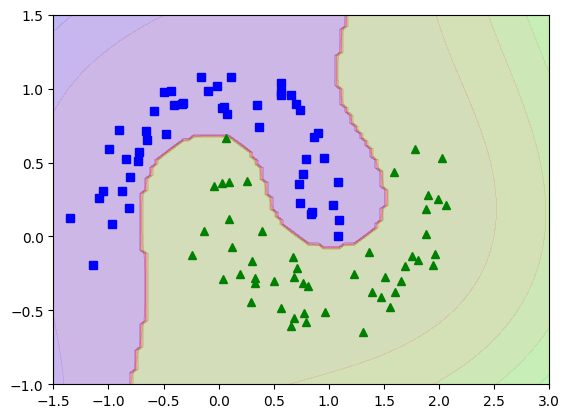

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(X[:,0][y==0],X[:,1][y==0],'bs')
plt.plot(X[:,0][y==1],X[:,1][y==1],'g^')

x0s = np.linspace(-1.5,3,100)
x1s = np.linspace(-1,1.5,100)

x0,x1 = np.meshgrid(x0s,x1s)
X = np.c_[x0.ravel(), x1.ravel()]

y_pred = poly_svm_clf.predict(X).reshape(x0.shape)
y_decision = poly_svm_clf.decision_function(X).reshape(x0.shape)
plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

Polynomial Kernel

In [56]:
#simulating kernels without having to ad d them
#also known as kernel trick

In [57]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([('scaler',StandardScaler()),('svm_clf',SVC(kernel='poly', degree=3, coef0=1, C=5))])

In [58]:
X, y= make_moons(n_samples=100, noise=0.20)

In [59]:
poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

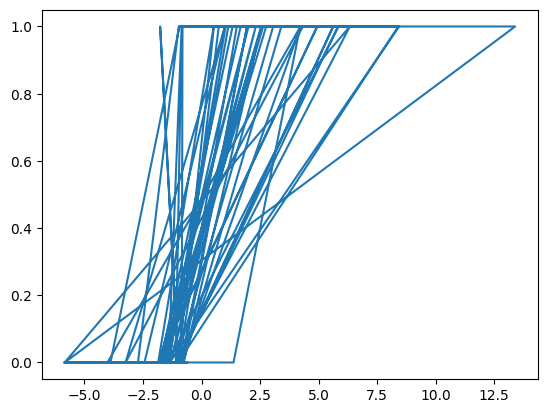

In [62]:
def kernel_plotter(X, y):
    